In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Gulim'

In [2]:
# 1 수집 (과학 : 20, 에너지 : 65)

In [3]:
class collect(object):
    def __init__(self,types,idn):
        self.types = types
        self.idn = idn
    def clt(self):      
        df = pd.DataFrame(columns=['분야','발행일','제목','내용'])
        url = 'https://www.etnews.com/news/section.html?id1=20&id2=0'+self.idn+'&page=1000'
        html = urlopen(url)
        soup = bs(html.read(),'html.parser')
        last_p = soup.find('a',{'href':'javascript:;'}).text
        baseurl = 'https://www.etnews.com'
        for pg in range(1,int(last_p)+1):
            url = 'https://www.etnews.com/news/section.html?id1=20&id2=0'+self.idn+'&page='+str(pg)
            html = urlopen(url)
            soup = bs(html.read(),'html.parser')
            print(("%d 페이지 진행중"%pg))
            mkurl = soup.select('p > a')
            tclist = []
            for i in mkurl:
                link = i.attrs['href']
                if 'https' not in link:
                    tclist.append(baseurl+link)
            for j in tclist:
                html = urlopen(j)
                soup = bs(html.read(),'html.parser')
                date = soup.find_all('time')[0].text[6:16]
                title = soup.find_all('h2')[0].text
                tmpcontext = []
                for k in range(len(soup.find_all('article',{'class':'article_body_wrap'})[0].find_all('p'))):
                    tmpcontext.append(soup.find_all('article',{'class':'article_body_wrap'})[0].find_all('p')[k].text.replace('\n',' '))
                context = ''.join(tmpcontext)
                tmp_df = pd.DataFrame([[self.types,date,title,context]],columns=df.columns)
                df = pd.concat([df,tmp_df])
        return df
science = collect('과학','20')
new_df1 = science.clt()
energy = collect('에너지','65')
new_df2 = energy.clt()
new_df = pd.concat([new_df1,new_df2])
new_df.index=np.arange(new_df.shape[0])

1 페이지 진행중
2 페이지 진행중
3 페이지 진행중
4 페이지 진행중
5 페이지 진행중
6 페이지 진행중
7 페이지 진행중
8 페이지 진행중
9 페이지 진행중
10 페이지 진행중
11 페이지 진행중
12 페이지 진행중
13 페이지 진행중
14 페이지 진행중
15 페이지 진행중
16 페이지 진행중
17 페이지 진행중
18 페이지 진행중
19 페이지 진행중
20 페이지 진행중
21 페이지 진행중
1 페이지 진행중
2 페이지 진행중
3 페이지 진행중
4 페이지 진행중
5 페이지 진행중
6 페이지 진행중
7 페이지 진행중
8 페이지 진행중
9 페이지 진행중
10 페이지 진행중
11 페이지 진행중
12 페이지 진행중
13 페이지 진행중
14 페이지 진행중
15 페이지 진행중
16 페이지 진행중
17 페이지 진행중
18 페이지 진행중
19 페이지 진행중
20 페이지 진행중
21 페이지 진행중
22 페이지 진행중
23 페이지 진행중
24 페이지 진행중
25 페이지 진행중
26 페이지 진행중
27 페이지 진행중
28 페이지 진행중
29 페이지 진행중
30 페이지 진행중
31 페이지 진행중
32 페이지 진행중
33 페이지 진행중
34 페이지 진행중
35 페이지 진행중
36 페이지 진행중
37 페이지 진행중
38 페이지 진행중
39 페이지 진행중
40 페이지 진행중
41 페이지 진행중
42 페이지 진행중
43 페이지 진행중
44 페이지 진행중
45 페이지 진행중
46 페이지 진행중
47 페이지 진행중
48 페이지 진행중
49 페이지 진행중
50 페이지 진행중
51 페이지 진행중
52 페이지 진행중
53 페이지 진행중
54 페이지 진행중
55 페이지 진행중
56 페이지 진행중
57 페이지 진행중
58 페이지 진행중
59 페이지 진행중
60 페이지 진행중
61 페이지 진행중
62 페이지 진행중
63 페이지 진행중
64 페이지 진행중
65 페이지 진행중
66 페이지 진행중
67 페이지 진행중
68 페이지 진행중
69 페이지 진행중
70 페이지 진행중
71 페이지 진행중
72 페이지

In [4]:
new_df.to_csv('임태환_수집.csv',index=False)

In [5]:
# 2 가공 및 처리

In [6]:
new_df1 = pd.read_csv('임태환_수집.csv')

In [7]:
#가공 및 처리
words = ['전기','에너지','원자력','수력','화력']
for i in words:
    tmp_df = new_df1.내용.str.count(i).reset_index().iloc[:,[-1]]
    tmp_df.rename(columns={'내용':i+'(빈도수)'},inplace=True)
    new_df1 = pd.concat([new_df1,tmp_df],axis=1)

In [8]:
new_df1

,분야,발행일,제목,내용,전기(빈도수),에너지(빈도수),원자력(빈도수),수력(빈도수),화력(빈도수)
0,과학,2023-09-13,[과학기술이 미래다] 〈102〉국내 첫 퍼스널 컴퓨터 경진대회,1984년 4월 22일. 제1회 퍼스널 컴퓨터 경진대회가 이날 오전 9시 서울 송파...,3,0,0,0,0
1,과학,2023-09-13,나노·소재 성과공유회,나노·소재분야 R&D 정책 및 우수 연구성과를 발표하고 성과물을 공유하는 나노·소재...,0,0,0,0,0
2,과학,2023-09-12,[알림] 테크비즈코리아 2023,전자신문사가 올해에도 우리 연구 현장의 사업화 유망기술을 민간기업과 투자자에 소개하...,1,1,2,0,0
3,과학,2023-09-12,드럼치는 로봇 '모펫' 입니다,국내 연구진이 음악 빅데이터 기반 인공지능(AI)을 통해 인간과 상호작용하며 합주...,0,0,0,0,0
4,과학,2023-09-11,드럼치는 로봇 '모펫' 입니다,국내 연구진이 음악 빅데이터 기반 인공지능(AI)을 통해 인간과 상호작용하며 합주...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1490,에너지,2023-03-19,[대한민국 대전환 'ON' 시즌2] '한국형 그린버튼' ICT로 저소비·고효율 백년...,#산업통상자원부와 국회가 추진하는 에너지이용합리화법 전부 개정안은 세계적인 에너지 ...,0,44,0,0,0
1491,에너지,2023-03-19,[대한민국 대전환 'ON' 시즌2] ICT 기술로 우리집도 에너지 효율↑,정보통신기술(ICT)을 활용해 가정에서도 에너지 효율 기술이 주목받고 있다. 애플리...,2,11,0,0,0
1492,에너지,2023-03-19,[대한민국 대전환 'ON' 시즌2]'사각지대' 중소·중견기업 에너지 효율 개선 주춧...,산업통상자원부는 에너지 효율의 사각지대인 중소·중견기업의 에너지 효율혁신 개선을 위...,0,20,0,0,0
1493,에너지,2023-03-19,[르포]역대급 섬 가뭄…해수담수화 선박·지하수 저류댐 '해갈',#50년만의 최악 가뭄이 광주·전남을 강타했다. 평균강우량이 예년의 67% 수준으로...,0,3,0,0,0


In [9]:
new_df1.to_csv('임태환_가공처리.csv',index=False)

In [10]:
# 3 통계분석

In [11]:
# 데이터 관련 단어 평균, 표준편차, 최빈단어
avg_df = new_df1.describe().iloc[1:3,:]
for i in range(len(avg_df.columns)):
    print(avg_df.columns[i][:-5],":"+" 평균 =",round(avg_df.iloc[0,i],3),"/ 표준편차 =",round(avg_df.iloc[1,i],3))
print("최빈단어 : "+new_df1.iloc[:,4:].columns[new_df1.iloc[:,4:].sum().argmax()][:-5])

전기 : 평균 = 1.071 / 표준편차 = 3.153
에너지 : 평균 = 2.332 / 표준편차 = 4.917
원자력 : 평균 = 0.255 / 표준편차 = 1.277
수력 : 평균 = 0.043 / 표준편차 = 0.233
화력 : 평균 = 0.023 / 표준편차 = 0.204
최빈단어 : 에너지


In [12]:
# 분야별 데이터 관련 단어 평균, 분산, 표준편차
new_df1.groupby('분야').agg(['mean','var','std'])

전기(빈도수)                       에너지(빈도수)                       원자력(빈도수)  \
         mean        var       std      mean        var       std      mean   
분야                                                                            
과학   0.355482   1.576545  1.255605  0.348837   0.914574  0.956333  0.119601   
에너지  1.251256  11.889877  3.448170  2.831658  28.802316  5.366779  0.288945   

                          수력(빈도수)                       화력(빈도수)            \
          var       std      mean       var       std      mean       var   
분야                                                                          
과학   0.452315  0.672543  0.003322  0.003322  0.057639  0.006645  0.006622   
에너지  1.922309  1.386473  0.052764  0.066786  0.258430  0.027638  0.050367   

               
          std  
분야             
과학   0.081378  
에너지  0.224426

In [13]:
# 분야별 최빈단어 구하기
max_df = new_df1.groupby('분야').sum()
for i in range(max_df.shape[0]):
    print(max_df.index[i]+"분야의 최빈단어는 "+max_df.columns[max_df.iloc[i,:].argmax()][:-5]+"입니다.")

과학분야의 최빈단어는 전기입니다.
에너지분야의 최빈단어는 에너지입니다.


In [14]:
# 4 시각화

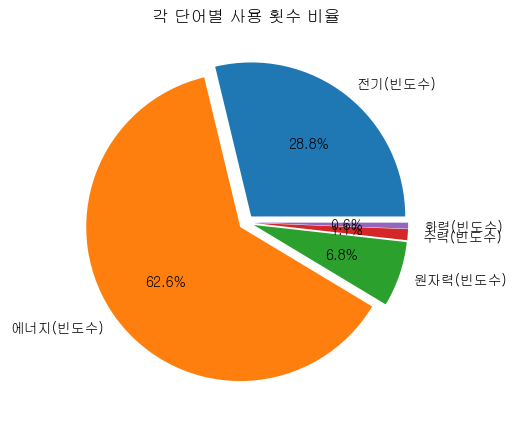

In [15]:
#각 단어별 사용 횟수 비율
fig, ax = plt.subplots(figsize=(5,5))
label = new_df1.iloc[:,4:].columns
explode = [0.05,0.05,0.05,0.05,0.05]
ax.pie(new_df1.iloc[:,4:].sum(),labels = label,autopct='%.1f%%',explode=explode)
ax.set_title('각 단어별 사용 횟수 비율')
fig.show()

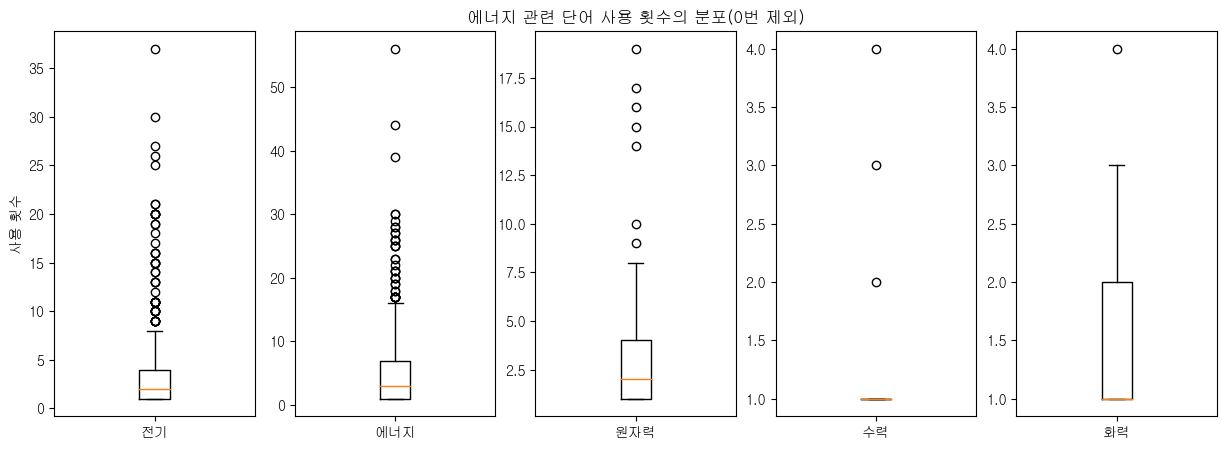

In [16]:
# 0번을 제외한 에너지 관련 단어 빈도수의 분포
bx_df = new_df1.iloc[:,4:]
fig, ax = plt.subplots(1,5,figsize=(15,5))
for i in range(bx_df.shape[1]):
    bx_df1 = bx_df.iloc[:,[i]]
    bx_df1 = bx_df1[bx_df1[bx_df1.columns[0]] != 0]
    bx_df = new_df1.iloc[:,4:]
    ax[i].boxplot(bx_df1)
    ax[i].set_xticklabels([bx_df.columns[i][:-5]])
ax[2].set_title('에너지 관련 단어 사용 횟수의 분포(0번 제외)')
ax[0].set_ylabel('사용 횟수')
fig.show()

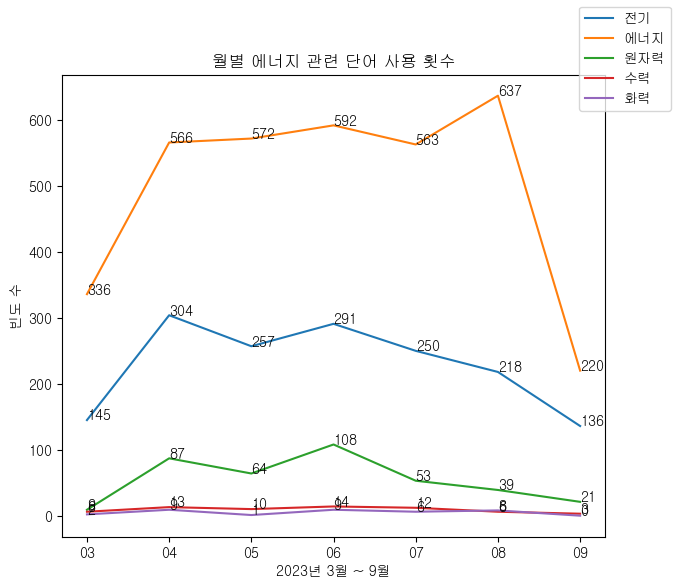

In [17]:
# 월 별 에너지 관련 단어의 사용 횟수
tmp_df2 = new_df1.copy()
tmp_df2.발행일 = new_df1.발행일.str[5:7]
frebymonth = tmp_df2.groupby('발행일').sum()
fig, ax = plt.subplots(figsize=(7,6))
for i in frebymonth.columns:
    x = frebymonth.index
    y = frebymonth[i]
    label = i[:-5]
    ax.plot(x,y,label=label)
    ax.set_title("월별 에너지 관련 단어 사용 횟수")
    ax.set_xlabel("2023년 3월 ~ 9월")
    ax.set_ylabel("빈도 수")
    for idx, val in zip(frebymonth.index, frebymonth[i].values):
        ax.annotate(val,(idx,val))
fig.legend(loc='upper right')
fig.show()

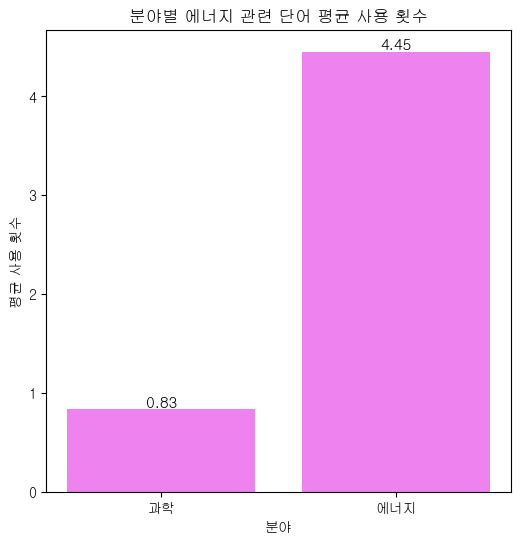

In [18]:
#분야별 에너지 관련 단어 평균 사용 횟수 
emptylist =[]
for i in range(len(max_df.index)):
    emptylist.append(int(max_df.iloc[i,:].sum()) / new_df1.분야.str.count(str(max_df.index[i])).sum())
tmp3_df=({'분야':['과학','에너지'],'평균':emptylist})
tmp3_df = pd.DataFrame(tmp3_df)

plt.figure(figsize=(6,6))
plt.bar(tmp3_df.분야,tmp3_df.평균,color='violet')
plt.title('분야별 에너지 관련 단어 평균 사용 횟수')
plt.xlabel('분야')
plt.ylabel('평균 사용 횟수')
for idx, val in zip(tmp3_df.분야,round(tmp3_df.평균,2)):
    plt.annotate(val,(idx,val),xytext=(0,2),textcoords='offset points',color='black',ha='center',fontsize=11)
plt.show()

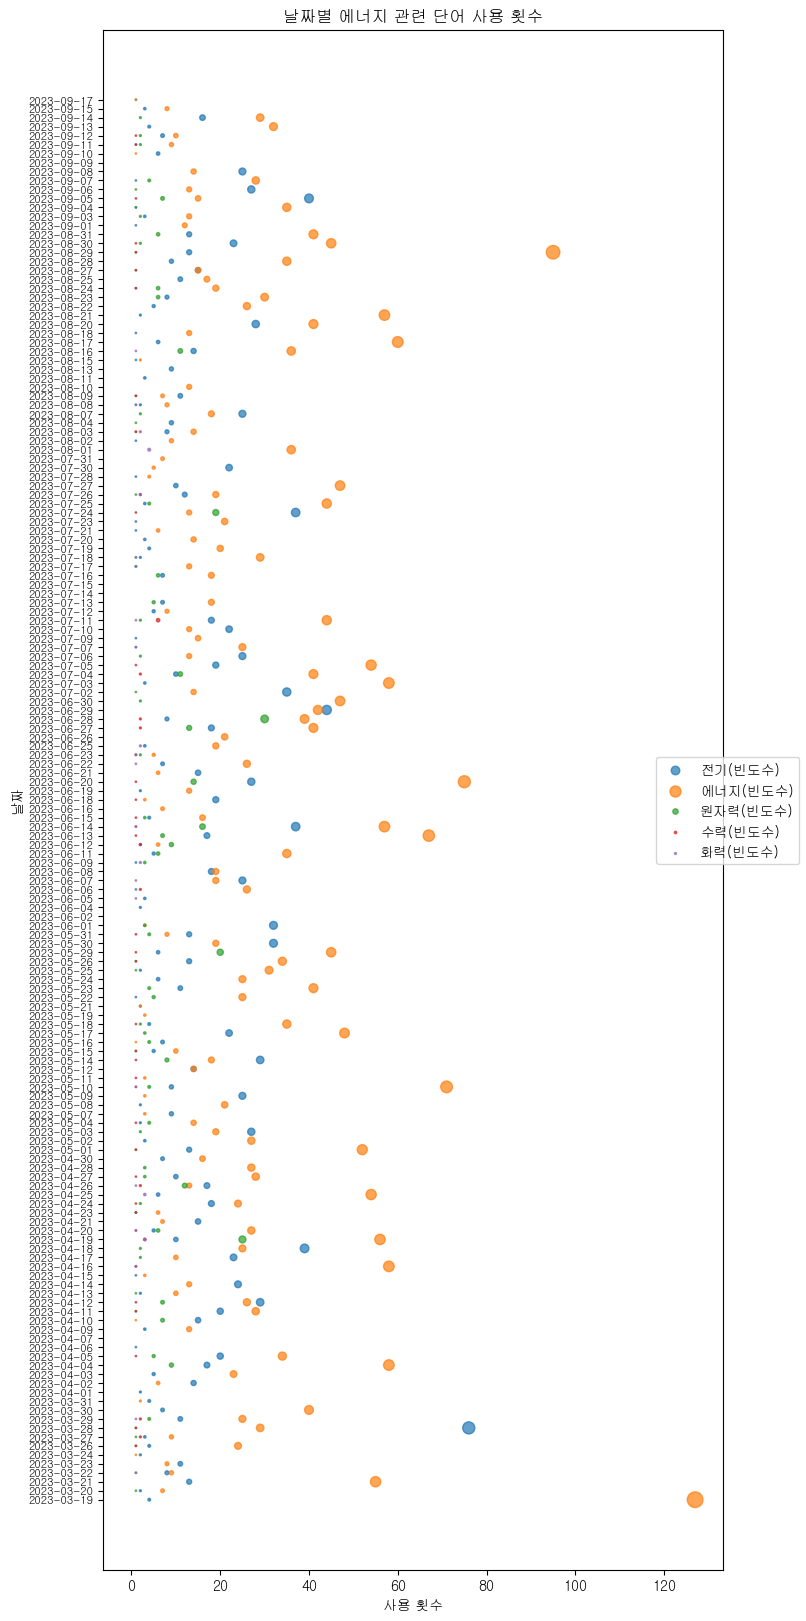

In [19]:
#날짜별 에너지 관련 단어 사용 횟수
sc_df = new_df1.groupby('발행일').sum()
sc_df.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(8,20))
for i in range(1,sc_df.shape[1]):
    sc = ax.scatter(sc_df[sc_df.columns[i]],sc_df.발행일,s=sc_df[sc_df.columns[i]],alpha=0.7)
plt.yticks(fontsize=8)
plt.title('날짜별 에너지 관련 단어 사용 횟수')
plt.xlabel('사용 횟수')
plt.ylabel('날짜')
fig.legend(sc_df.columns[1:],loc='center right')
fig.show()